In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_context('notebook')
sns.set_style('white')


# Import radon data
df1 = pd.read_csv('http://www.stat.columbia.edu/~gelman/arm/examples/radon_complete/srrs1.dat')
df2 = pd.read_csv('http://www.stat.columbia.edu/~gelman/arm/examples/radon_complete/srrs2.dat')
df3 = pd.read_csv('http://www.stat.columbia.edu/~gelman/arm/examples/radon_complete/srrs3.dat')
df4 = pd.read_csv('http://www.stat.columbia.edu/~gelman/arm/examples/radon_complete/srrs4.dat')
df5 = pd.read_csv('http://www.stat.columbia.edu/~gelman/arm/examples/radon_complete/srrs5.dat')


In [237]:
df = pd.concat([df1, df2, df3, df4, df5])
df.columns = df.columns.map(str.strip)

In [238]:
df.shape

(63291, 25)

In [239]:
start_dates = df.startdt.apply(lambda x: str(x).zfill(6))
stop_dates = df.stopdt.apply(lambda x: str(x).zfill(6))

df['startdt'] = pd.to_datetime(start_dates)
df['stopdt'] = pd.to_datetime(stop_dates)

df['year'] = pd.DatetimeIndex(df['stopdt']).year

In [240]:
#df.county.value_counts()
df.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,startdt,stopdt,activity,pcterr,adjwt,dupflag,zipflag,cntyfips,county,year
0,1,AL,AL,1,36067,6,1,1,3,,...,1987-02-24,1987-02-26,0.4,0.0,395.145068,0,0,1,AUTAUGA,1987
1,2,AL,AL,1,36067,6,1,1,3,,...,1987-02-24,1987-02-28,0.6,31.5,453.339921,0,0,1,AUTAUGA,1987
2,3,AL,AL,1,36067,6,1,1,1,,...,1987-03-03,1987-03-03,1.5,11.2,395.145068,0,0,1,AUTAUGA,1987
3,4,AL,AL,1,36067,6,1,0,7,,...,1987-02-27,1987-03-03,6.3,4.6,395.145068,0,0,1,AUTAUGA,1987
4,5,AL,AL,1,36067,6,1,1,3,,...,1987-03-03,1987-03-03,0.2,0.0,376.809515,0,0,1,AUTAUGA,1987


In [241]:
df.columns

Index(['idnum', 'state', 'state2', 'stfips', 'zip', 'region', 'typebldg',
       'floor', 'room', 'basement', 'windoor', 'rep', 'stratum', 'wave',
       'starttm', 'stoptm', 'startdt', 'stopdt', 'activity', 'pcterr', 'adjwt',
       'dupflag', 'zipflag', 'cntyfips', 'county', 'year'],
      dtype='object')

In [242]:
#cty = pd.read_csv(get_data('cty.dat'))

In [243]:
df.year.value_counts()

1988    13954
1990    13552
1989    12313
1987    10646
1991    10292
1992     1989
1986      529
1999       15
1998        1
Name: year, dtype: int64

In [244]:
df.stfips = df.cntyfips.apply(lambda x: str(x).zfill(2))
df.cntyfips = df.cntyfips.apply(lambda x: str(x).zfill(3))
df['State-county recode'] = df.stfips+df.cntyfips
df.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,stopdt,activity,pcterr,adjwt,dupflag,zipflag,cntyfips,county,year,State-county recode
0,1,AL,AL,01,36067,6,1,1,3,,...,1987-02-26,0.4,0.0,395.145068,0,0,001,AUTAUGA,1987,01001
1,2,AL,AL,01,36067,6,1,1,3,,...,1987-02-28,0.6,31.5,453.339921,0,0,001,AUTAUGA,1987,01001
2,3,AL,AL,01,36067,6,1,1,1,,...,1987-03-03,1.5,11.2,395.145068,0,0,001,AUTAUGA,1987,01001
3,4,AL,AL,01,36067,6,1,0,7,,...,1987-03-03,6.3,4.6,395.145068,0,0,001,AUTAUGA,1987,01001
4,5,AL,AL,01,36067,6,1,1,3,,...,1987-03-03,0.2,0.0,376.809515,0,0,001,AUTAUGA,1987,01001


In [245]:
df['State-county recode'].value_counts()

01001     2662
13013     1923
03003     1834
00000     1520
17017     1461
07007     1338
19019     1330
31031     1260
05005     1230
33033     1171
21021     1117
09009     1051
45045      954
89089      930
15015      916
63063      916
35035      860
37037      849
43043      838
27027      822
23023      802
49049      757
41041      739
91091      721
25025      719
79079      707
29029      690
99099      683
111111     662
77077      662
          ... 
301301       3
497497       3
379379       3
429429       3
417417       2
750750       2
78078        2
595595       2
385385       2
489489       2
249249       2
351351       2
610610       2
503503       2
433433       1
427427       1
413413       1
735735       1
269269       1
580580       1
461461       1
560560       1
435435       1
447447       1
391391       1
387387       1
431431       1
455455       1
36036        1
830830       1
Name: State-county recode, Length: 313, dtype: int64

In [246]:
#Certain codes are 6 digits.. not sure why. When I merge with other df should get rid of these

In [247]:
df.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,stopdt,activity,pcterr,adjwt,dupflag,zipflag,cntyfips,county,year,State-county recode
0,1,AL,AL,01,36067,6,1,1,3,,...,1987-02-26,0.4,0.0,395.145068,0,0,001,AUTAUGA,1987,01001
1,2,AL,AL,01,36067,6,1,1,3,,...,1987-02-28,0.6,31.5,453.339921,0,0,001,AUTAUGA,1987,01001
2,3,AL,AL,01,36067,6,1,1,1,,...,1987-03-03,1.5,11.2,395.145068,0,0,001,AUTAUGA,1987,01001
3,4,AL,AL,01,36067,6,1,0,7,,...,1987-03-03,6.3,4.6,395.145068,0,0,001,AUTAUGA,1987,01001
4,5,AL,AL,01,36067,6,1,1,3,,...,1987-03-03,0.2,0.0,376.809515,0,0,001,AUTAUGA,1987,01001


In [248]:
df[df['State-county recode']=='111111']

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,stopdt,activity,pcterr,adjwt,dupflag,zipflag,cntyfips,county,year,State-county recode
1001,1002,AL,AL,111,36263,6,1,1,3,,...,1987-05-05,1.3,15.9,243.243284,1,0,111,RANDOLPH,1987,111111
1002,1003,AL,AL,111,36263,6,1,1,2,,...,1987-02-27,1.8,11.7,240.570280,0,0,111,RANDOLPH,1987,111111
1003,1004,AL,AL,111,36274,6,1,1,1,,...,1987-03-03,0.3,0.0,243.243284,0,0,111,RANDOLPH,1987,111111
1004,1005,AL,AL,111,36274,6,0,9,0,,...,1987-03-28,0.6,48.9,392.931458,0,0,111,RANDOLPH,1987,111111
1005,1006,AL,AL,111,36274,6,1,1,7,,...,1987-04-04,0.7,24.5,240.570280,0,0,111,RANDOLPH,1987,111111
1006,1007,AL,AL,111,36276,6,1,1,3,,...,1987-03-30,1.9,9.6,636.174742,0,0,111,RANDOLPH,1987,111111
1007,1008,AL,AL,111,36276,6,1,1,7,,...,1987-04-04,0.4,0.0,240.570280,0,0,111,RANDOLPH,1987,111111
1008,1009,AL,AL,111,36278,6,1,1,2,,...,1987-03-26,1.7,10.0,243.243284,0,0,111,RANDOLPH,1987,111111
1009,1010,AL,AL,111,36280,6,2,1,1,,...,1987-04-04,1.5,12.0,392.931458,0,0,111,RANDOLPH,1987,111111
1431,1432,CO,CO,111,81433,.,1,1,1,N,...,1988-05-23,1.4,33.8,0.000000,0,0,111,,1988,111111


In [249]:
df['county'] = df.county.str.title()

In [250]:
df['State_and_county'] = df.county.str.strip() + ' County, ' + df.state.str.strip()

In [251]:
df.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,activity,pcterr,adjwt,dupflag,zipflag,cntyfips,county,year,State-county recode,State_and_county
0,1,AL,AL,01,36067,6,1,1,3,,...,0.4,0.0,395.145068,0,0,001,Autauga,1987,01001,"Autauga County, AL"
1,2,AL,AL,01,36067,6,1,1,3,,...,0.6,31.5,453.339921,0,0,001,Autauga,1987,01001,"Autauga County, AL"
2,3,AL,AL,01,36067,6,1,1,1,,...,1.5,11.2,395.145068,0,0,001,Autauga,1987,01001,"Autauga County, AL"
3,4,AL,AL,01,36067,6,1,0,7,,...,6.3,4.6,395.145068,0,0,001,Autauga,1987,01001,"Autauga County, AL"
4,5,AL,AL,01,36067,6,1,1,3,,...,0.2,0.0,376.809515,0,0,001,Autauga,1987,01001,"Autauga County, AL"


In [252]:
grouped = pd.DataFrame(df.groupby(['State_and_county','year'])['activity'].mean()).reset_index()

In [253]:
grouped.head(200)

,State_and_county,year,activity
0,"County, CO",1987,5.366667
1,"County, CO",1988,6.043878
2,"County, PA",1988,3.980000
3,"County, PA",1989,8.016667
4,"Abbeville County, SC",1990,0.571429
5,"Acadia County, LA",1990,0.430769
6,"Accomack County, VA",1992,0.320000
7,"Acoma County, R6",1989,3.730612
8,"Ada County, ID",1990,2.768531
9,"Adair County, IA",1989,10.066667


In [254]:
grouped_pivot = grouped.pivot(index='State_and_county',columns='year',values='activity').reset_index()

In [255]:
grouped = pd.DataFrame(grouped.groupby('State_and_county')['activity'].mean()).reset_index()

In [256]:
df_lung = pd.read_csv('lung_dataframe.csv',converters={'Combined': lambda x: str(x),'State-county recode_x': lambda x: str(x)})

In [257]:
#df_lung['State-county recode_x']

In [258]:
def index_lookup(df_lung):
    counter = 0
    lst = []
    for i in df_lung["State_and_county"]:
        if i not in list(grouped['State_and_county'].values):
            lst.append(np.nan)
        else:
            ind = list(grouped['State_and_county'].values).index(i)
            lst.append(ind)
        counter += 1
    return lst

In [259]:
lst = index_lookup(df_lung)

In [260]:
list(grouped['State_and_county'].values)

[' County, CO',
 ' County, PA',
 'Abbeville County, SC',
 'Acadia County, LA',
 'Accomack County, VA',
 'Acoma County, R6',
 'Ada County, ID',
 'Adair County, IA',
 'Adair County, KY',
 'Adair County, MO',
 'Adair County, OK',
 'Adams County, CO',
 'Adams County, IA',
 'Adams County, ID',
 'Adams County, IL',
 'Adams County, IN',
 'Adams County, MS',
 'Adams County, ND',
 'Adams County, NE',
 'Adams County, OH',
 'Adams County, PA',
 'Adams County, WA',
 'Adams County, WI',
 'Addison County, VT',
 'Aiken County, SC',
 'Aitkin County, MN',
 'Alamance County, NC',
 'Alameda County, CA',
 'Alamo County, R6',
 'Alamosa County, CO',
 'Albany County, WY',
 'Albemarle County, VA',
 'Alcona County, MI',
 'Alcorn County, MS',
 'Alexander County, IL',
 'Alexander County, NC',
 'Alexandria-City County, VA',
 'Alfalfa County, OK',
 'Alger County, MI',
 'Allamakee County, IA',
 'Allegan County, MI',
 'Allegany County, MD',
 'Alleghany County, NC',
 'Alleghany County, VA',
 'Allegheny County, PA',
 

In [261]:
for i in df_lung["State-county recode_x"]:
    print(i)

06001
06001
06001
06001
06001
06001
06013
06013
06013
06013
06013
06013
06041
06041
06041
06041
06041
06041
06075
06075
06075
06075
06075
06075
06081
06081
06081
06081
06081
06081
09001
09001
09001
09001
09001
09001
09003
09003
09003
09003
09003
09003
09005
09005
09005
09005
09005
09005
09007
09007
09007
09007
09007
09007
09009
09009
09009
09009
09009
09009
09011
09011
09011
09011
09011
09011
09013
09013
09013
09013
09013
09013
09015
09015
09015
09015
09015
09015
13063
13063
13063
13063
13063
13063
13067
13067
13067
13067
13067
13067
13089
13089
13089
13089
13089
13089
13121
13121
13121
13121
13121
13121
13135
13135
13135
13135
13135
13135
15001
15001
15001
15001
15001
15001
15003
15003
15003
15003
15003
15003
15005
15005
15005
15005
15005
15005
15007
15007
15007
15007
15007
15007
15009
15009
15009
15009
15009
15009
15900
15900
15900
15900
15900
15900
19001
19001
19001
19001
19001
19001
19003
19003
19003
19003
19003
19003
19005
19005
19005
19005
19005
19005
19007
19007
19007
19007
1900

In [262]:
for i in lst:
    print(i)

27
27
27
27
27
27
568
568
568
568
568
568
1604
1604
1604
1604
1604
1604
2250
2250
2250
2250
2250
2250
2258
2258
2258
2258
2258
2258
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
506
506
506
506
506
506
530
530
530
530
530
530
669
669
669
669
669
669
898
898
898
898
898
898
1035
1035
1035
1035
1035
1035
1106
1106
1106
1106
1106
1106
1154
1154
1154
1154
1154
1154
nan
nan
nan
nan
nan
nan
1321
1321
1321
1321
1321
1321
1650
1650
1650
1650
1650
1650
nan
nan
nan
nan
nan
nan
7
7
7
7
7
7
12
12
12
12
12
12
39
39
39
39
39
39
73
73
73
73
73
73
103
103
103
103
103
103
173
173
173
173
173
173
199
199
199
199
199
199
221
221
221
221
221
221
254
254
254
254
254
254
275
275
275
275
275
275
280
280
280
280
280
280
297
297
297
297
297
297
322
322
322
322
322
322
362
362
362
362
362
362
383
383
383
383
383
383
400
400
400
400
400
400
404
404
404
404
404
404
429


In [263]:
# def add_radon(lst):
#     arr = []
#     for x in lst:
#         new_list = []
#         for year in range(1988,1993):
#             if np.isnan(x):
#                 new_list.append(np.nan)
#             else:
#                 new_list.append(grouped.iloc[x][year])
#         arr.append(new_list)
        
#     counter = 0
#     for yr in grouped.iloc[1][3:8].index:
#         df_lung[str(yr)+"_radon"] = [i[counter] for i in arr]
#         counter += 1

In [266]:
def add_radon(lst):
    newlist = []
    for x in lst:
        if np.isnan(x):
            newlist.append(np.nan) 
        else:
            newlist.append(grouped.iloc[x]['activity'])
    df_lung['radon_mean'] = newlist

In [267]:
#grouped.iloc[1][1988]
add_radon(lst)
# for yr in grouped.iloc[1][3:8].index:
#     print(yr)

In [268]:
df_lung.head()

,Unnamed: 0,Combined,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,...,2003_air,2004_air,2005_air,2006_air,2007_air,2008_air,2009_air,2010_air,2011_air,radon_mean
0,0,0600111,436899.0,438510.0,431849.0,425037.0,418563.0,413911.0,411279.0,411723.0,...,12.459122,11.617424,11.197772,11.763339,11.182633,13.056139,10.936849,9.255255,10.49448,0.798333
1,1,0600112,435721.0,435837.0,429229.0,423076.0,417045.0,412694.0,410372.0,410128.0,...,12.459122,11.617424,11.197772,11.763339,11.182633,13.056139,10.936849,9.255255,10.49448,0.798333
2,2,0600121,108456.0,107549.0,104959.0,102891.0,101111.0,99282.0,98714.0,98521.0,...,12.459122,11.617424,11.197772,11.763339,11.182633,13.056139,10.936849,9.255255,10.49448,0.798333
3,3,0600122,124576.0,122862.0,120063.0,117843.0,115609.0,113459.0,112599.0,112100.0,...,12.459122,11.617424,11.197772,11.763339,11.182633,13.056139,10.936849,9.255255,10.49448,0.798333
4,4,0600131,167215.0,177626.0,182665.0,186705.0,190279.0,194185.0,198338.0,203922.0,...,12.459122,11.617424,11.197772,11.763339,11.182633,13.056139,10.936849,9.255255,10.49448,0.798333


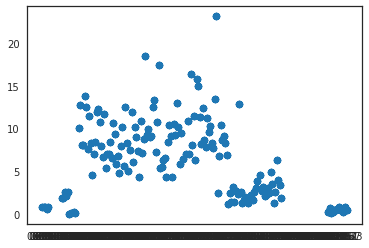

In [271]:
plt.scatter(df_lung['State-county recode_x'],df_lung.radon_mean)